In [1]:
import keras 
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense,MaxPool2D,Flatten
from keras.callbacks import EarlyStopping

## Model

In [57]:
cnn = Sequential()

cnn.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())

cnn.add(Dense(256,activation='relu'))
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(32,activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))

cnn.compile(optimizer="Adam",loss='binary_crossentropy',metrics=["accuracy"])
cnn.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 30752)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               7872768   
_________________________________________________________________
dense_37 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 1)               

In [15]:
early_stopping = EarlyStopping(patience=5)

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_set = ImageDataGenerator(rescale=1/255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)
test_set = ImageDataGenerator(rescale=1/255)

In [43]:
trainning_set = train_set.flow_from_directory('data/train',target_size=(64,64),batch_size=15,class_mode='binary')
testing_set = test_set.flow_from_directory('data/test',target_size=(64,64),batch_size=10,class_mode='binary')

Found 600 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


In [58]:
history = cnn.fit_generator(trainning_set,steps_per_epoch=40,epochs=30,validation_steps=14,validation_data=testing_set)

Epoch 1/30
40/40 [==============================] - 6s 154ms/step - loss: 0.8009 - accuracy: 0.5267 - val_loss: 0.6342 - val_accuracy: 0.6357
Epoch 2/30
40/40 [==============================] - 6s 160ms/step - loss: 0.6566 - accuracy: 0.5833 - val_loss: 0.8741 - val_accuracy: 0.5267
Epoch 3/30
40/40 [==============================] - 7s 163ms/step - loss: 0.6325 - accuracy: 0.6400 - val_loss: 0.7281 - val_accuracy: 0.6641
Epoch 4/30
40/40 [==============================] - 6s 151ms/step - loss: 0.5791 - accuracy: 0.7050 - val_loss: 0.5913 - val_accuracy: 0.7328
Epoch 5/30
40/40 [==============================] - 6s 154ms/step - loss: 0.5445 - accuracy: 0.7267 - val_loss: 0.8848 - val_accuracy: 0.6947
Epoch 6/30
40/40 [==============================] - 6s 151ms/step - loss: 0.4831 - accuracy: 0.7733 - val_loss: 0.4655 - val_accuracy: 0.6947
Epoch 7/30
40/40 [==============================] - 6s 153ms/step - loss: 0.4367 - accuracy: 0.7833 - val_loss: 0.5513 - val_accuracy: 0.6947
Epoch 

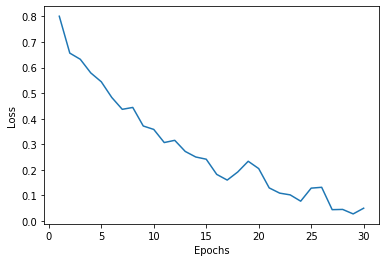

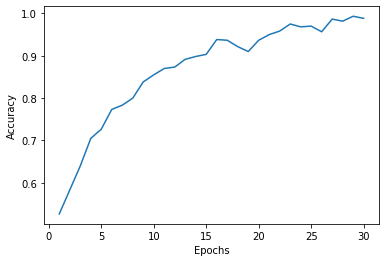

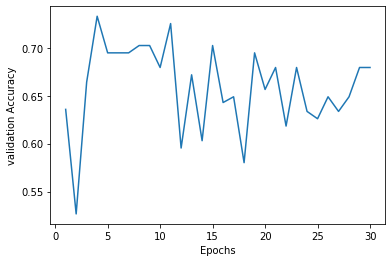

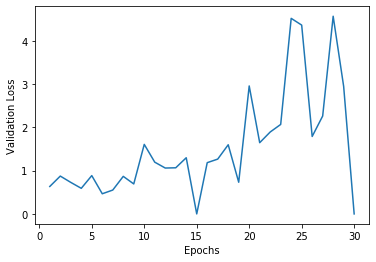

In [59]:
epoch_count = range(1,len(history.history["loss"])+1)
plt.plot(epoch_count,history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


plt.plot(epoch_count,history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


plt.plot(epoch_count,history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("validation Accuracy")
plt.show()


plt.plot(epoch_count,history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()


In [60]:
testing_set.class_indices

{'run': 0, 'walk': 1}

           Walking            


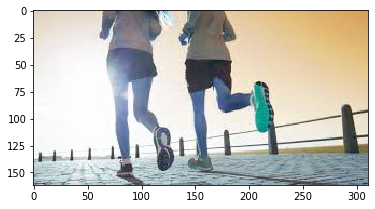

In [64]:
img = cv2.imread('predictions/test1.jpg')
plt.imshow(img)

img = cv2.resize(img,(64,64))
img = img.reshape(1,64,64,3)

pred = cnn.predict(img)

if pred == [[1.]]:
    satement = "Walking"
    print(satement.center(30))
else:
    statement = "Running"
    print(statement.center(30))
 


           Running            


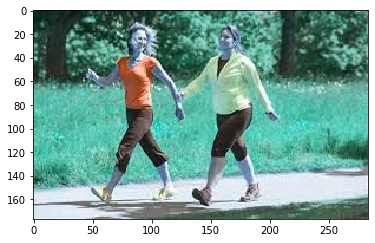

In [65]:

img = cv2.imread('predictions/test2.jpg')
plt.imshow(img)

img = cv2.resize(img,(64,64))
img = img.reshape(1,64,64,3)

pred = cnn.predict(img)

if pred == [[1.]]:
    satement = "Walking"
    print(satement.center(30))
else:
    statement = "Running"
    print(statement.center(30))

           Running            


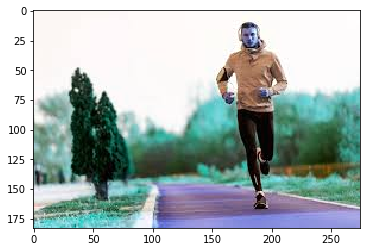

In [66]:

img = cv2.imread('predictions/test5.jpg')
plt.imshow(img)

img = cv2.resize(img,(64,64))
img = img.reshape(1,64,64,3)

pred = cnn.predict(img)

if pred == [[1.]]:
    satement = "Walking"
    print(satement.center(30))
else:
    statement = "Running"
    print(statement.center(30))
    

           Running            


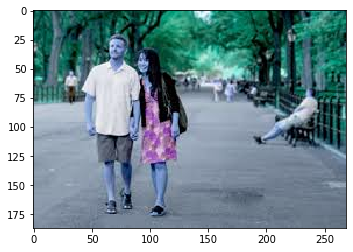

In [67]:
img = cv2.imread('predictions/test4.jpg')
plt.imshow(img)

img = cv2.resize(img,(64,64))
img = img.reshape(1,64,64,3)

pred = cnn.predict(img)

if pred == [[1.]]:
    satement = "Walking"
    print(satement.center(30))
else:
    statement = "Running"
    print(statement.center(30))
    

           Running            


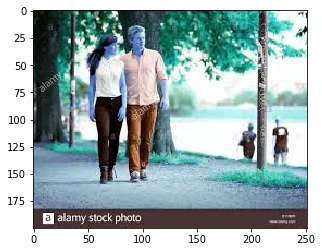

In [68]:
img = cv2.imread('predictions/test3.jpg')
plt.imshow(img)

img = cv2.resize(img,(64,64))
img = img.reshape(1,64,64,3)

pred = cnn.predict(img)

if pred == [[1.]]:
    satement = "Walking"
    print(satement.center(30))
else:
    statement = "Running"
    print(statement.center(30))